[[ 1.  0.]
 [-0.  1.]]


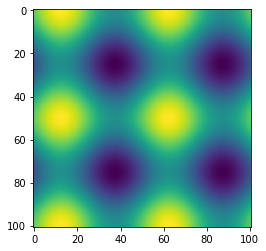

In [1]:
import numpy as np
from matplotlib.pyplot import figure, imshow

# Generate a meshgrid and rotate it by RotRad radians.
def DoRotation(xspan, yspan, RotRad=0):

    # Clockwise, 2D rotation matrix
    RotMatrix = np.array([  [np.cos(RotRad),  np.sin(RotRad)],
                            [-np.sin(RotRad), np.cos(RotRad)]])
    print(RotMatrix)

    # This makes two 2D arrays which are the x and y coordinates for each point.
    x, y = np.meshgrid(xspan,yspan)

    # After rotating, I'll have another two 2D arrays with the same shapes.
    xrot = np.zeros(x.shape)
    yrot = np.zeros(y.shape)

    # Dot the rotation matrix against each coordinate from the meshgrids.
    # I BELIEVE THERE IS A BETTER WAY THAN THIS DOUBLE LOOP!!!
    # I BELIEVE THERE IS A BETTER WAY THAN THIS DOUBLE LOOP!!!
    # I BELIEVE THERE IS A BETTER WAY THAN THIS DOUBLE LOOP!!!
    # I BELIEVE THERE IS A BETTER WAY THAN THIS DOUBLE LOOP!!!
    # I BELIEVE THERE IS A BETTER WAY THAN THIS DOUBLE LOOP!!!
    # I BELIEVE THERE IS A BETTER WAY THAN THIS DOUBLE LOOP!!!
    for i in range(len(xspan)):
        for j in range(len(yspan)):
            xrot[i,j], yrot[i,j] = np.dot(RotMatrix, np.array([x[i,j], y[i,j]]))

    # Now the matrix is rotated
    return xrot, yrot



In [ ]:
# Define the range for x and y in the unrotated matrix
xspan = np.linspace(-2*np.pi, 2*np.pi, 101)
yspan = np.linspace(-2*np.pi, 2*np.pi, 101)

# Pick some arbitrary function and plot it (no rotation)
x, y = DoRotation(xspan, yspan, 0)
z = np.sin(x)+np.cos(y)
figure()
imshow(z)

[[ 0.95533649  0.29552021]
 [-0.29552021  0.95533649]]


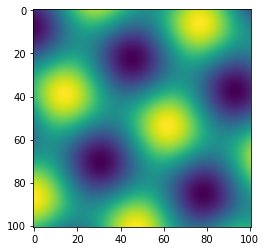

In [2]:
# And now with 0.3 radian rotation so you can see that it works.
x, y = DoRotation(xspan, yspan, 0.3)
z = np.sin(x)+np.cos(y)
figure()
imshow(z)

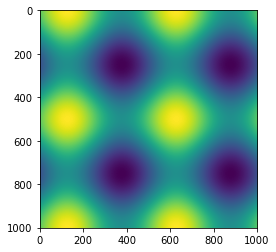

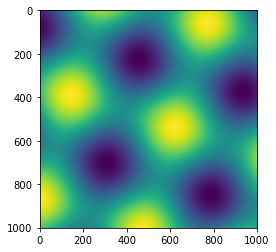

In [6]:
# Example 2
# Define the range for x and y in the unrotated matrix
xspan = np.linspace(-2*np.pi, 2*np.pi, 1001)
yspan = np.linspace(-2*np.pi, 2*np.pi, 1001)

x, y = np.meshgrid(xspan,yspan)
z = np.sin(x)+np.cos(y)
figure()
imshow(z)

# Clockwise, 2D rotation matrix
RotRad = 0.3
RotMatrix = np.array([[np.cos(RotRad),  np.sin(RotRad)],
                [-np.sin(RotRad), np.cos(RotRad)]])

mult = np.dot( RotMatrix, np.array([x.ravel(),y.ravel()]) )
xrot = mult[0,:].reshape(x.shape)
yrot = mult[1,:].reshape(y.shape)
zrot = np.sin(xrot)+np.cos(yrot)
figure()
imshow(zrot)


In [21]:
from math import *

def rotated_grid_transform(grid_in, option, SP_coor, angle=0):
    lon = grid_in[0]
    lat = grid_in[1];

    lon = (lon*pi)/180; # Convert degrees to radians
    lat = (lat*pi)/180;

    SP_lon = SP_coor[0];
    SP_lat = SP_coor[1];

    #theta = 90+SP_lat; # Rotation around y-axis
    theta = SP_lat+angle; # Rotation around y-axis
    phi = SP_lon; # Rotation around z-axis

    theta = (theta*pi)/180;
    phi = (phi*pi)/180; # Convert degrees to radians

    x = cos(lon)*cos(lat); # Convert from spherical to cartesian coordinates
    y = sin(lon)*cos(lat);
    z = sin(lat);

    if option == 1: # Regular -> Rotated

        x_new = cos(theta)*cos(phi)*x + cos(theta)*sin(phi)*y + sin(theta)*z;
        y_new = -sin(phi)*x + cos(phi)*y;
        z_new = -sin(theta)*cos(phi)*x - sin(theta)*sin(phi)*y + cos(theta)*z;

    else:  # Rotated -> Regular

        phi = -phi;
        theta = -theta;

        x_new = cos(theta)*cos(phi)*x + sin(phi)*y + sin(theta)*cos(phi)*z;
        y_new = -cos(theta)*sin(phi)*x + cos(phi)*y - sin(theta)*sin(phi)*z;
        z_new = -sin(theta)*x + cos(theta)*z;



    lon_new = atan2(y_new,x_new); # Convert cartesian back to spherical coordinates
    lat_new = asin(z_new);

    lon_new = (lon_new*180)/pi; # Convert radians back to degrees
    lat_new = (lat_new*180)/pi;

    print(lon_new,lat_new)


In [18]:
rotated_grid_transform((0,0), 1, (0,30))

0.0 -29.999999999999996


In [23]:
rotated_grid_transform((0,0), 0, (0,0), angle=45)

0.0 44.99999999999999


In [24]:
from math import sin, cos, pi

def rotatePoints(axis, r_angle, points):

    points_rot = []

    for point in points:
        tr = [point[0] - axis[0], point[1] - axis[1]]
        xrot = tr[0]*cos(r_angle*(pi/180)) - tr[1]*sin(r_angle*(pi/180))  
        yrot = tr[0]*sin(r_angle*(pi/180)) + tr[1]*cos(r_angle*(pi/180)) 
        xnew = xrot + axis[0]
        ynew = yrot + axis[1]
        points_rot.append([xnew,ynew])

    return points_rot

In [26]:
axis = [0, 0]

In [29]:
points = ([0, 0])

In [28]:
r_angle = 0